In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Importing NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
# Downloading NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Loading the dataset
data = pd.read_csv('spam_ham_dataset.csv.zip')

# Renaming the column "Unnamed: 0" to "Unnamed"
data.rename(columns={"Unnamed: 0": "Unnamed"}, inplace=True)
data


,Unnamed,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Data exploration
print(data.head())  # Displaying the first few rows of the dataset
print('####################################                               ####################################')
print(data.shape)  # Displaying the shape of the dataset
print('####################################                               ####################################')
print(data.describe())  # Displaying descriptive statistics of the dataset
print('####################################                               ####################################')
print(data.info())  # Displaying information about the dataset
print('####################################                               ####################################')
print(data['label_num'].value_counts())  # Counting the number of occurrences for each label

   Unnamed label                                               text  label_num
0      605   ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1     2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2     3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     4685  spam  Subject: photoshop , windows , office . cheap ...          1
4     2030   ham  Subject: re : indian springs\r\nthis deal is t...          0
####################################                               ####################################
(5171, 4)
####################################                               ####################################
           Unnamed    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000
####################

In [ ]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing punctuation and stop words
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    # Stemming
    tokens = [ps.stem(token) for token in tokens]
    # Joining tokens back to text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

data['text'] = data['text'].apply(preprocess_text)
print(data['text'])

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom januari 9 2001 see attach file...
2       subject neon retreat ho ho ho around wonder ti...
3       subject photoshop window offic cheap main tren...
4       subject indian spring deal book teco pvr reven...
                              ...                        
5166    subject put 10 ft transport volum decreas 2500...
5167    subject 3 4 2000 follow nom hpl take extra 15 ...
5168    subject calpin daili ga nomin juli mention ear...
5169    subject industri worksheet august 2000 activ a...
5170    subject import onlin bank alert dear valu citi...
Name: text, Length: 5171, dtype: object


In [ ]:
# Building a classification model
X = data['text']  # Extracting the features (text)
y = data['label']  # Extracting the target variable (label_num)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating a pipeline for text classification
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Converting text into numerical features
    ('classifier', MultinomialNB())  # Training a Naive Bayes classifier
])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
# Evaluating the model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred,pos_label='spam'))
print('Recall:', recall_score(y_test, y_pred,pos_label='spam'))
print('F1 Score:', f1_score(y_test, y_pred,pos_label='spam'))

Accuracy: 0.9729468599033816
Precision: 0.9461279461279462
Recall: 0.9590443686006825
F1 Score: 0.9525423728813558


In [ ]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.95      0.96      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



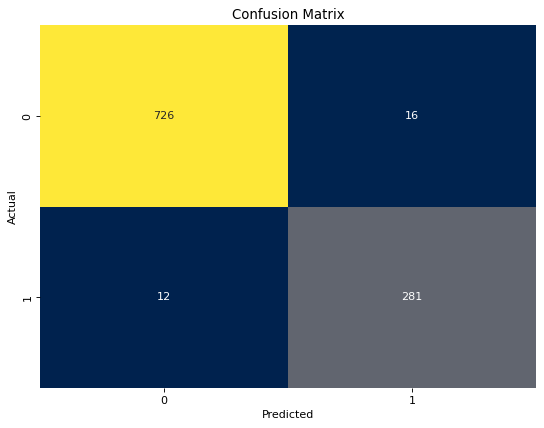

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

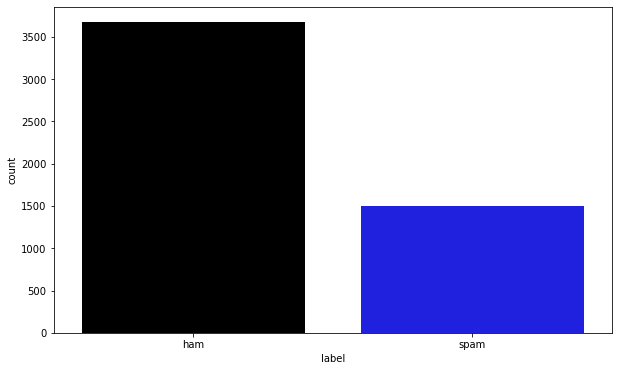

In [ ]:
# Data visualization
color = {"ham": "black", "spam": "blue"}
plt.figure(figsize=(10, 6))
sns.countplot(data['label'], palette=color)
plt.show()

In [ ]:
msg1=["Urgent! You won a million dollars! Click here to claim your prize!"]
msg2=["I'm going to the store. Do you need anything?"]
msg3=["hello my all student i want to talk about media next lecture"]

In [ ]:
print(pipeline.predict(msg1))
print(pipeline.predict(msg2))
print(pipeline.predict(msg3))

['spam']
['spam']
['spam']
